In [1]:
import pandas as pd
import numpy as np
import warnings

In [64]:
data=pd.read_csv('abalone.csv')

In [65]:
data.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [66]:
data.shape

(4177, 9)

In [67]:
data.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [68]:
data['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
26      1
29      1
25      1
1       1
2       1
Name: Rings, dtype: int64

In [69]:
data['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Rings', ylabel='count'>

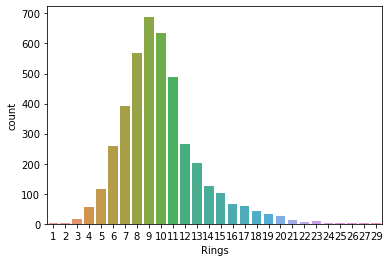

In [71]:
sns.countplot(data['Rings'])

In [72]:
duplicate=data.duplicated()
print(duplicate.sum())
data[duplicate]

0


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [73]:
#'sex' is in the object data type so we use one hot encoder
encoded_data=pd.get_dummies(data,drop_first=True)
encoded_data.head()


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0


In [24]:
encoded_data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684,0.312904,0.321283,0.365813
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169,0.463731,0.467025,0.481715
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000,0.000000,0.000000,0.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000,0.000000,0.000000,0.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000,0.000000,0.000000,0.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000,1.000000,1.000000,1.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000,1.000000,1.000000,1.000000


from the description of the data we can see height is having min is 0 it means it has some outliers in it because minmum height is not in 0 it must have some number otherwise it doesn't make sense

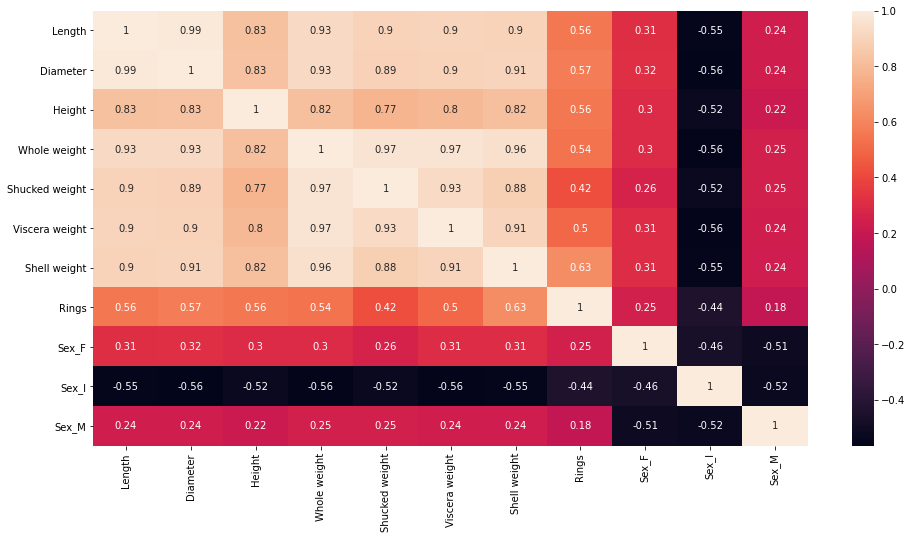

In [14]:
plt.figure(figsize=(16,8))
sns.heatmap(encoded_data.corr(),annot=True)
plt.show()

In [31]:
encoded_data.corr()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720,0.309666,-0.551465,0.236543
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660,0.318626,-0.564315,0.240376
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467,0.298421,-0.518552,0.215459
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390,0.299741,-0.557592,0.252038
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884,0.263991,-0.521842,0.251793
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819,0.308444,-0.556081,0.242194
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574,0.306319,-0.546953,0.235391
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000,0.250279,-0.436063,0.181831
Sex_F,0.309666,0.318626,0.298421,0.299741,0.263991,0.308444,0.306319,0.250279,1.000000,-0.464298,-0.512528
Sex_I,-0.551465,-0.564315,-0.518552,-0.557592,-0.521842,-0.556081,-0.546953,-0.436063,-0.464298,1.000000,-0.522541


height and length are corelating each other and they are same corelation with the label also so we can see in the encoded_data.corr() height is having more corelation with the label so we remove the length 

In [27]:
encoded_data.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,0,1,0


In [74]:
data=encoded_data.drop(columns=['Length'])

In [75]:
data.head()

,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_I,Sex_M
0,0.365,0.095,0.5140,0.2245,0.1010,0.150,15,0,1
1,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,0,1
2,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,0,0
3,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,0,1
4,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,1,0


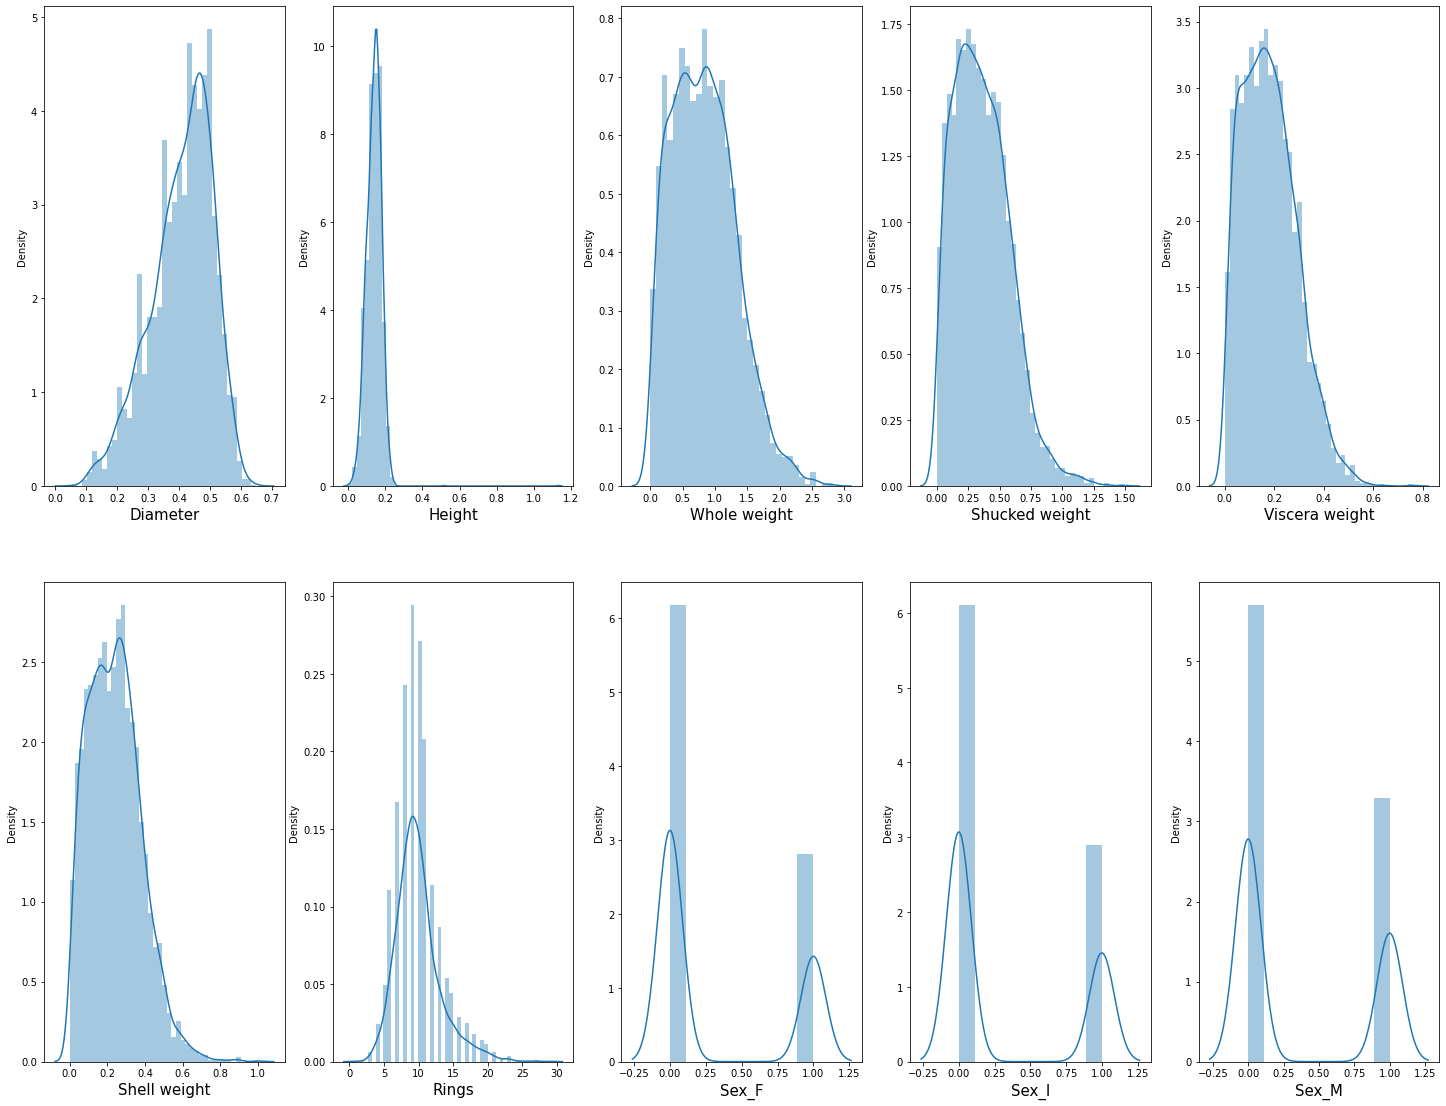

In [30]:
plt.figure(figsize=(25,30))
plotnumber=1
for column in data:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
        
    plotnumber+=1
plt.show()

In [76]:
data.skew()

Diameter         -0.609198
Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
Sex_I             0.765708
Sex_M             0.557390
dtype: float64

In [77]:
from scipy.stats import zscore
z=np.abs(zscore(data))
z.shape

(4177, 9)

In [78]:
threshold=3
print(np.where(z>3)) 

(array([   6,   72,   81,   83,  129,  163,  164,  165,  165,  165,  166,
        166,  167,  168,  170,  181,  232,  236,  236,  237,  238,  270,
        275,  277,  278,  294,  310,  313,  314,  334,  351,  355,  358,
        358,  362,  375,  416,  417,  428,  431,  433,  469,  478,  480,
        501,  526,  530,  572,  628,  673,  674,  675,  678,  694,  696,
        719,  720,  744,  754,  756,  811,  891,  891,  891, 1048, 1051,
       1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206, 1206, 1207, 1207,
       1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418, 1422, 1426, 1427,
       1427, 1427, 1428, 1429, 1528, 1754, 1756, 1757, 1759, 1761, 1762,
       1762, 1762, 1763, 1763, 1763, 1821, 1982, 1987, 2051, 2090, 2108,
       2108, 2114, 2157, 2161, 2176, 2180, 2199, 2201, 2208, 2209, 2274,
       2275, 2305, 2334, 2334, 2334, 2335, 2344, 2358, 2368, 2436, 2459,
       2471, 2544, 2623, 2624, 2624, 2624, 2625, 2709, 2710, 2710, 2810,
       2810, 2811, 2811, 2811, 2862, 2863, 2863, 2

In [79]:
data_new=data[(z<3).all(axis=1)]
print(data.shape)
print(data_new.shape)

(4177, 9)
(4031, 9)


In [80]:
data_loss=((4177-4031)/4177)*100
data_loss

3.4953315776873355

In [81]:
data_new.columns

Index(['Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings', 'Sex_I', 'Sex_M'],
      dtype='object')

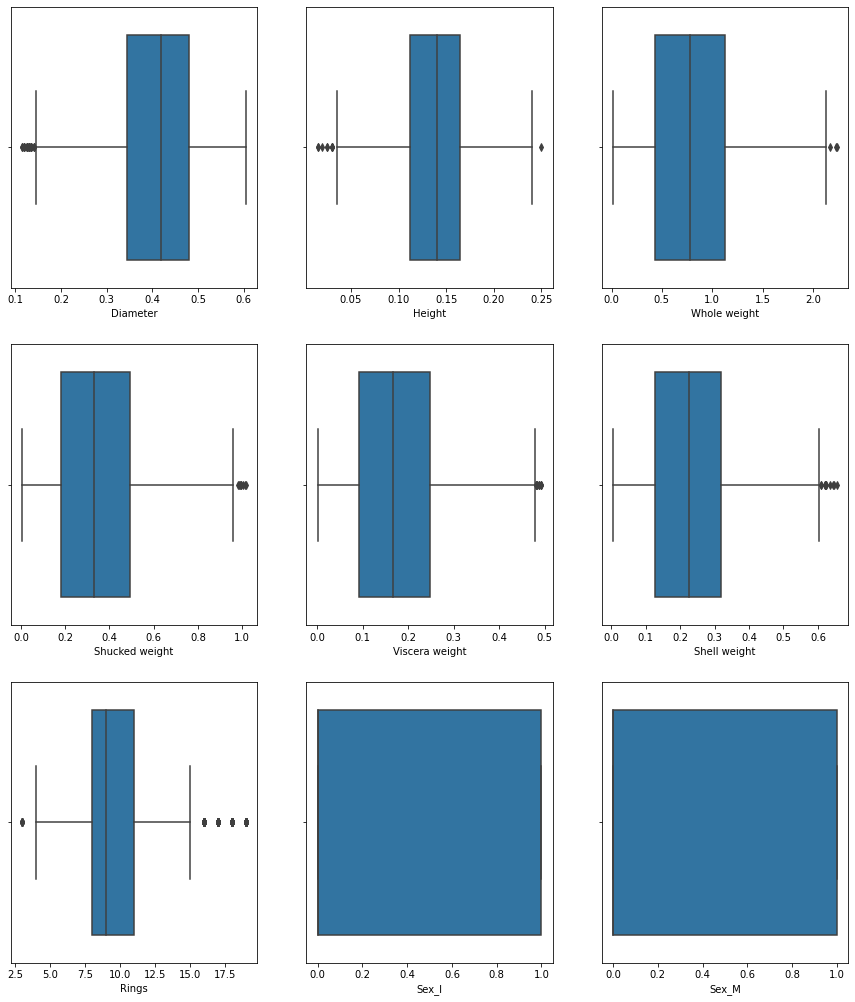

In [82]:
plt.figure(figsize=(15,30))
graph=1

for column in data_new:
    if graph<=30:
        ax=plt.subplot(5,3,graph)
        sns.boxplot(data_new[column])
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

In [83]:
data_new.skew()

Diameter         -0.607953
Height           -0.257638
Whole weight      0.333060
Shucked weight    0.457151
Viscera weight    0.436022
Shell weight      0.347931
Rings             0.721415
Sex_I             0.729598
Sex_M             0.577007
dtype: float64

In [84]:
#dividing data into x and y
x=data_new.drop(columns=['Rings'])
y=data_new['Rings']

In [85]:
x.shape

(4031, 8)

In [86]:
y.shape

(4031,)

In [87]:
#standardizing the data by using minmax scaler
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
scaler.fit_transform(x)

array([[0.51020408, 0.34042553, 0.22459532, ..., 0.22307692, 0.        ,
        1.        ],
       [0.30612245, 0.31914894, 0.0948741 , ..., 0.1       , 0.        ,
        1.        ],
       [0.62244898, 0.5106383 , 0.29788669, ..., 0.31538462, 0.        ,
        0.        ],
       ...,
       [0.73469388, 0.80851064, 0.52225719, ..., 0.46615385, 0.        ,
        1.        ],
       [0.75510204, 0.57446809, 0.48561151, ..., 0.44769231, 0.        ,
        0.        ],
       [0.89795918, 0.76595745, 0.86960432, ..., 0.75384615, 0.        ,
        1.        ]])

In [120]:
#linear Regression 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score

# using regression 

In [121]:
maxaccu_test=0
maxrs_test=0


for i in range(1,300):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    r2=r2_score(y_test,pred_test)
    if r2>maxaccu_test:
        maxaccu_test=r2
        maxrs_test=i
print('r2_score is',maxaccu_test,'random state at',maxrs_test)

r2_score is 0.5851818165870664 random state at 125


In [122]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=125,test_size=0.25)

In [123]:
lr.fit(x_train,y_train)
pred_test=lr.predict(x_test)
print('accuracy score',r2_score(y_test,predx))

accuracy score 0.5851818165870664


In [124]:
train_accuracy=r2_score(y_train,pred_train)
test_accuracy=r2_score(y_test,pred_test)

from sklearn.model_selection import cross_val_score
for i in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=i)
    cv_mean=cv_score.mean()
    
print(f'at cross fold {i} the cv score is {cv_mean} and accuracy for training is {train_accuracy} and accuracy for test is {test_accuracy}')

at cross fold 9 the cv score is 0.4480101857333886 and accuracy for training is -0.4961676276526248 and accuracy for test is 0.5851818165870664


In [125]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [128]:
mean_absolute_error(y_test,pred_test)

1.4175927269601425

In [139]:
mean_squared_error(y_test,pred_test)

3.461558909025201

In [130]:
np.sqrt(mean_squared_error(y_test,pred_test))

1.8605265139269584

<AxesSubplot:xlabel='Rings'>

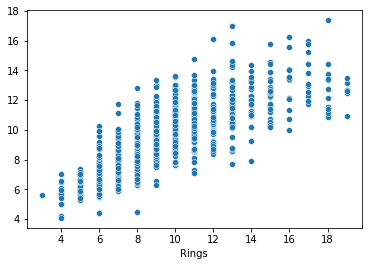

In [131]:
sns.scatterplot(y_test,predx)

In [133]:
#regularization 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={'alpha':[.01,1,10],'random_state':list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.01, 'random_state': 0}


In [134]:
ls=Lasso(alpha=0.01,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)

lss

0.5490497702094471

In [135]:
#ensemble techniques

from sklearn.ensemble import RandomForestRegressor

parameters={'criterion':['mse','mae'], 'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'log2'}


In [138]:
rf=RandomForestRegressor(criterion='mse',max_features='log2')
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)

rfs=r2_score(y_test,pred_decision)
print('r2score',rfs)


rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross_val_score:',rfc)

r2score 0.5796848409423395
cross_val_score: 0.46421588428975635
